### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print("Ingreso total Tienda 1:", ingreso_tienda1)
print("Ingreso total Tienda 2:", ingreso_tienda2)
print("Ingreso total Tienda 3:", ingreso_tienda3)
print("Ingreso total Tienda 4:", ingreso_tienda4)

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [10]:
# Cantidad de productos vendidos por categoría en cada tienda
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria_tienda1 = tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("Ventas por categoría Tienda 1:\n", ventas_categoria_tienda1)
print("Ventas por categoría Tienda 2:\n", ventas_categoria_tienda2)
print("Ventas por categoría Tienda 3:\n", ventas_categoria_tienda3)
print("Ventas por categoría Tienda 4:\n", ventas_categoria_tienda4)

Ventas por categoría Tienda 1:
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64
Ventas por categoría Tienda 2:
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64
Ventas por categoría Tienda 3:
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64
Ventas por categoría Tienda 4:
 Categoría del Produc

# 3. Calificación promedio de la tienda


In [6]:
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()


In [11]:
print("Calificación promedio Tienda 1:", calificacion_promedio_tienda1)
print("Calificación promedio Tienda 2:", calificacion_promedio_tienda2)
print("Calificación promedio Tienda 3:", calificacion_promedio_tienda3)
print("Calificación promedio Tienda 4:", calificacion_promedio_tienda4)

Calificación promedio Tienda 1: 3.976685036032217
Calificación promedio Tienda 2: 4.037303942348453
Calificación promedio Tienda 3: 4.048325561678677
Calificación promedio Tienda 4: 3.9957591178965224


# 4. Productos más y menos vendidos

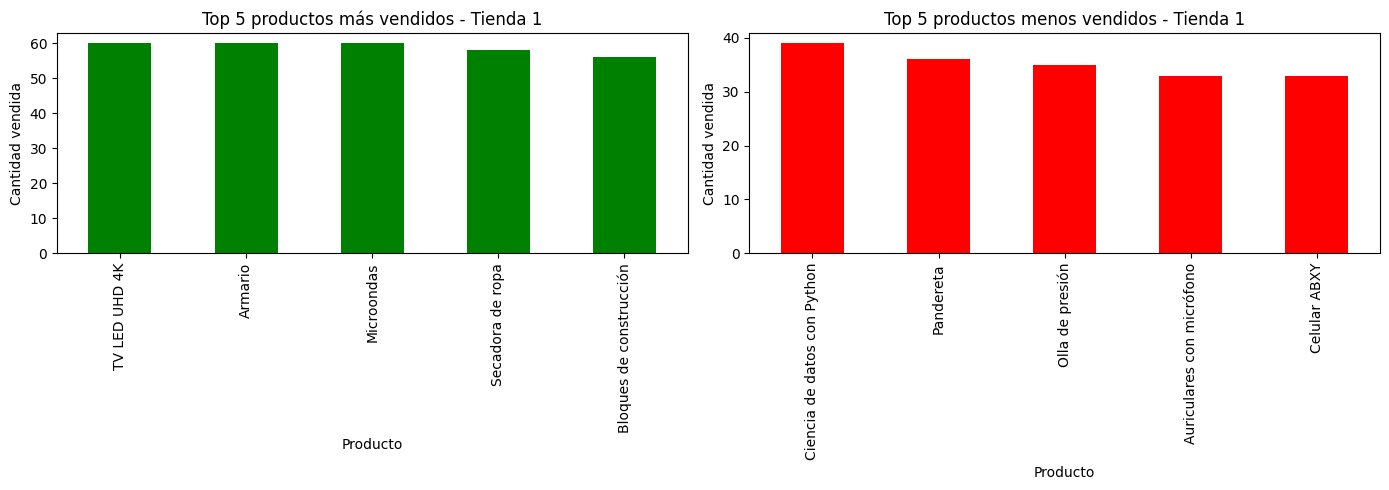

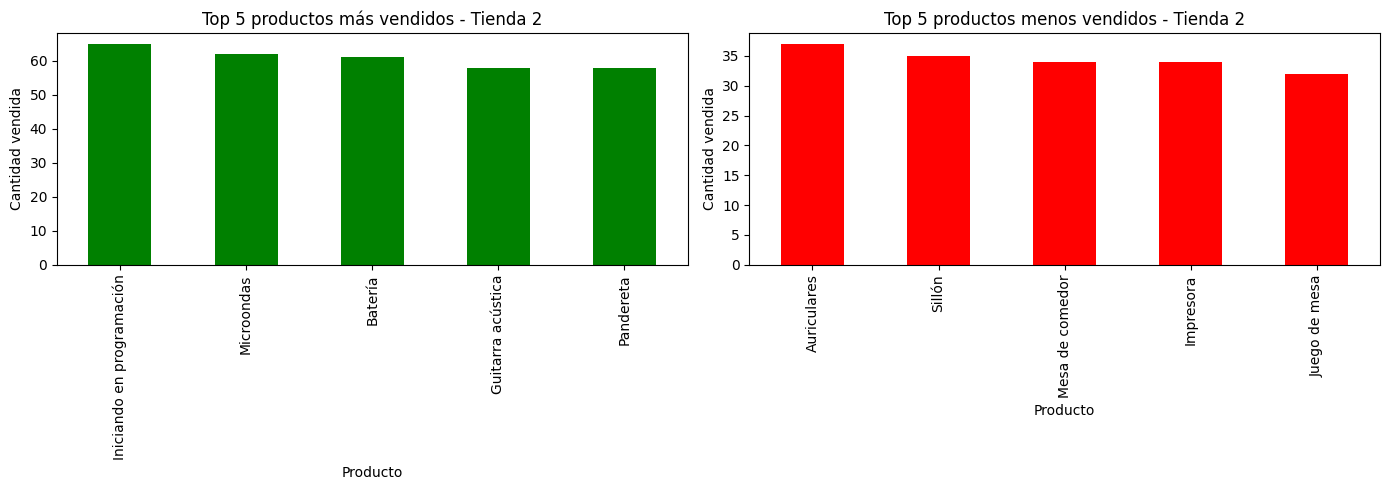

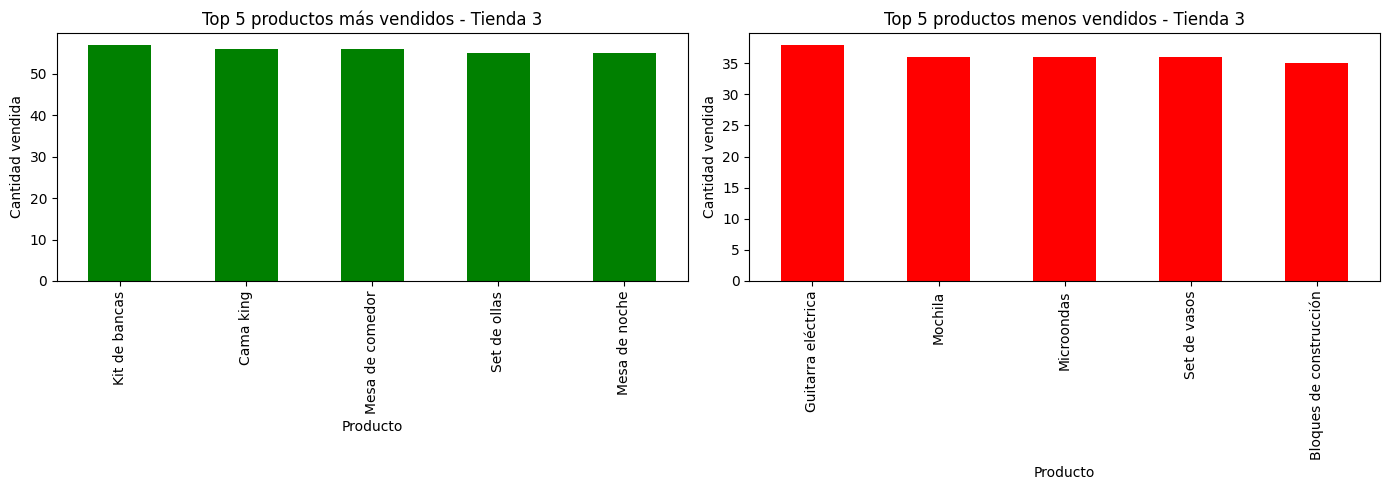

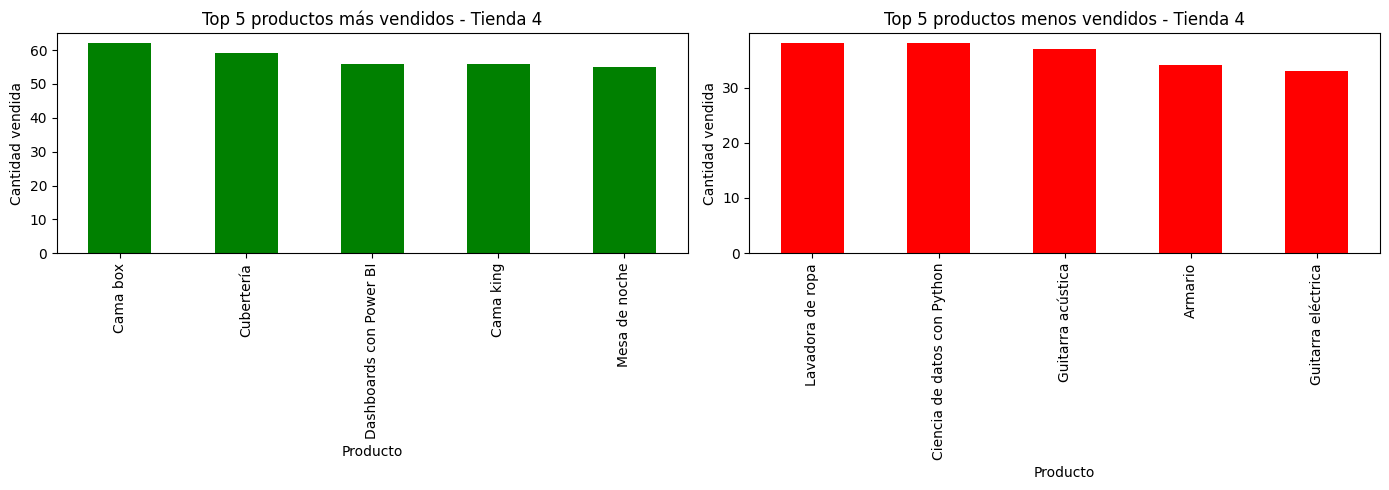

In [12]:
import matplotlib.pyplot as plt

# Productos más vendidos (top 5) y menos vendidos (bottom 5) por tienda
def plot_top_bottom_products(df, tienda_nombre):
    ventas_por_producto = df['Producto'].value_counts()
    top_5 = ventas_por_producto.head(5)
    bottom_5 = ventas_por_producto.tail(5)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    top_5.plot(kind='bar', ax=axes[0], color='green')
    axes[0].set_title(f'Top 5 productos más vendidos - {tienda_nombre}')
    axes[0].set_ylabel('Cantidad vendida')
    axes[0].set_xlabel('Producto')

    bottom_5.plot(kind='bar', ax=axes[1], color='red')
    axes[1].set_title(f'Top 5 productos menos vendidos - {tienda_nombre}')
    axes[1].set_ylabel('Cantidad vendida')
    axes[1].set_xlabel('Producto')

    plt.tight_layout()
    plt.show()

plot_top_bottom_products(tienda, "Tienda 1")
plot_top_bottom_products(tienda2, "Tienda 2")
plot_top_bottom_products(tienda3, "Tienda 3")
plot_top_bottom_products(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [ ]:
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print("Costo de envío promedio Tienda 1:", costo_envio_promedio_tienda1)
print("Costo de envío promedio Tienda 2:", costo_envio_promedio_tienda2)
print("Costo de envío promedio Tienda 3:", costo_envio_promedio_tienda3)
print("Costo de envío promedio Tienda 4:", costo_envio_promedio_tienda4)

Costo de envío promedio Tienda 1: 26018.60958033065
Costo de envío promedio Tienda 2: 25216.235693090293
Costo de envío promedio Tienda 3: 24805.680373039424
Costo de envío promedio Tienda 4: 23459.457167090754


## 6. Graficacion

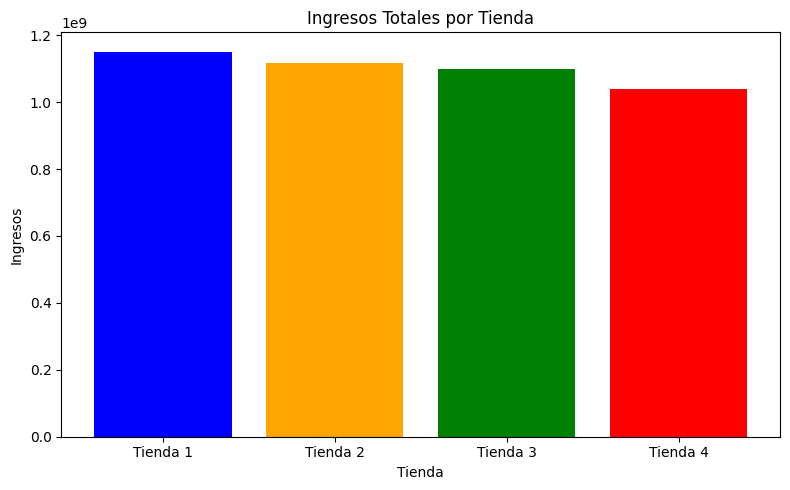

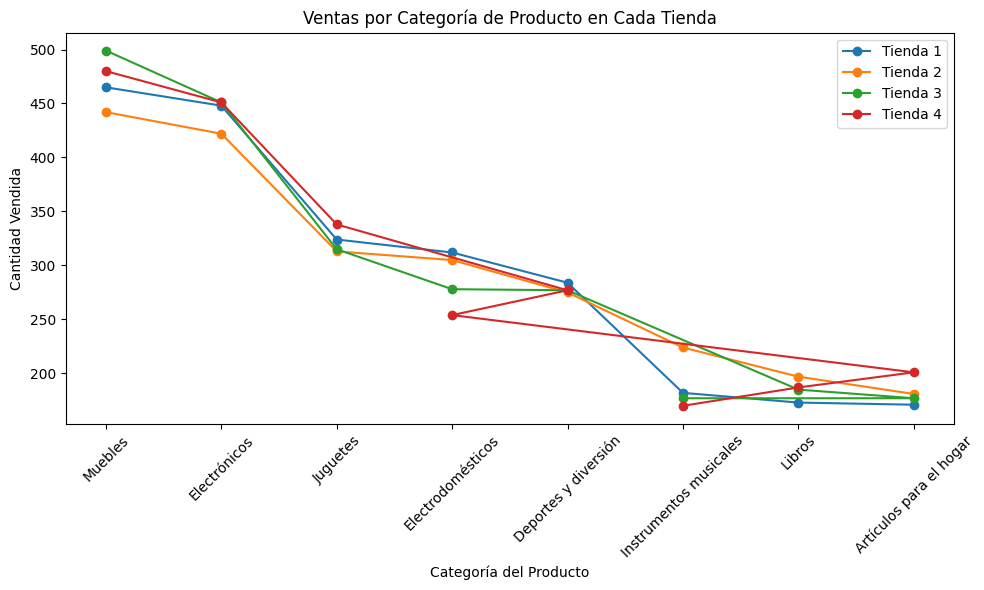

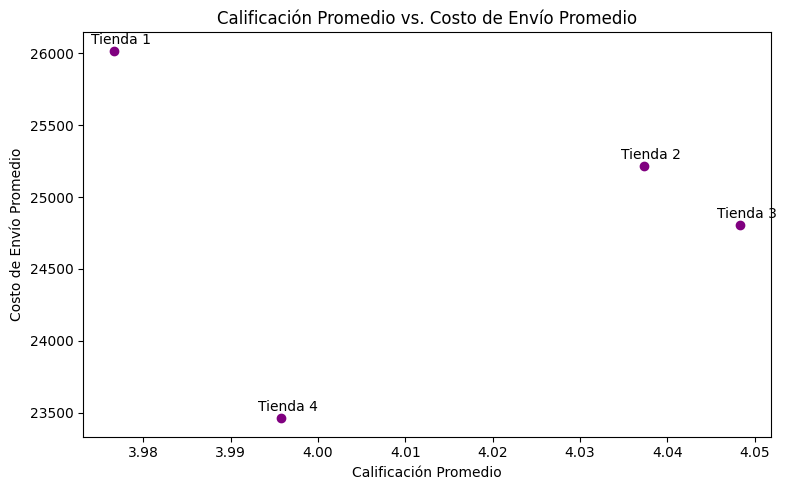

In [17]:
# Gráfico 1: Ingresos totales por tienda (barras)
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8,5))
plt.bar(tiendas, ingresos, color=['blue', 'orange', 'green', 'red'])
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de ventas por categoría (líneas)
plt.figure(figsize=(10,6))
plt.plot(ventas_categoria_tienda1.index, ventas_categoria_tienda1.values, marker='o', label='Tienda 1')
plt.plot(ventas_categoria_tienda2.index, ventas_categoria_tienda2.values, marker='o', label='Tienda 2')
plt.plot(ventas_categoria_tienda3.index, ventas_categoria_tienda3.values, marker='o', label='Tienda 3')
plt.plot(ventas_categoria_tienda4.index, ventas_categoria_tienda4.values, marker='o', label='Tienda 4')
plt.title('Ventas por Categoría de Producto en Cada Tienda')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Categoría del Producto')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 3: Calificación promedio vs. costo de envío promedio (dispersión)
calificaciones = [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
costos_envio = [costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4]

plt.figure(figsize=(8,5))
plt.scatter(calificaciones, costos_envio, color='purple')
for i, tienda in enumerate(tiendas):
    plt.annotate(tienda, (calificaciones[i], costos_envio[i]), textcoords="offset points", xytext=(5,5), ha='center')
plt.title('Calificación Promedio vs. Costo de Envío Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Costo de Envío Promedio')
plt.tight_layout()
plt.show()

### Informe Final: Recomendación de Tienda para el Sr. Juan

#### Introducción

El propósito de este análisis es determinar cuál de las cuatro tiendas es la mejor opción para que el Sr. Juan venda sus productos, considerando factores clave como ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de los clientes, productos más y menos vendidos, y el coste de envío promedio. La decisión se fundamenta en datos objetivos y visualizaciones generadas a partir de la información de cada tienda.

#### Análisis de Resultados

**1. Ingresos Totales**

- Tienda 1: \$1,150,880,400
- Tienda 2: \$1,116,343,500
- Tienda 3: \$1,098,019,600
- Tienda 4: \$1,038,375,700

La Tienda 1 lidera en ingresos totales, lo que indica un alto volumen de ventas y potencial de mercado.

**2. Categorías de Productos Más y Menos Vendidas**

Las categorías más vendidas en todas las tiendas son **Muebles** y **Electrónicos**, seguidas por **Juguetes** y **Electrodomésticos**. Las categorías menos vendidas varían, pero suelen ser **Libros**, **Instrumentos musicales** y **Artículos para el hogar**.

**3. Calificaciones Promedio de los Clientes**

- Tienda 1: 3.98
- Tienda 2: 4.04
- Tienda 3: 4.05
- Tienda 4: 4.00

Las Tiendas 2 y 3 tienen las mejores calificaciones promedio, lo que sugiere mayor satisfacción del cliente.

**4. Productos Más y Menos Vendidos**

En todas las tiendas, los productos más vendidos corresponden a las categorías líderes (Muebles y Electrónicos). Los menos vendidos suelen estar en las categorías menos populares.

**5. Coste de Envío Promedio**

- Tienda 1: \$26,018.61
- Tienda 2: \$25,216.24
- Tienda 3: \$24,805.68
- Tienda 4: \$23,459.46

La Tienda 4 ofrece el coste de envío promedio más bajo, lo que puede ser atractivo para los clientes sensibles al precio.

#### Conclusión y Recomendación

Si bien la **Tienda 1** destaca por sus altos ingresos y volumen de ventas, las **Tiendas 2 y 3** sobresalen en satisfacción del cliente, con las calificaciones promedio más altas. Por otro lado, la **Tienda 4** tiene el coste de envío más bajo, pero sus ingresos y calificaciones son ligeramente inferiores.

**Recomendación:**  
La mejor opción para el Sr. Juan es la **Tienda 3**, ya que combina una alta calificación promedio de clientes (4.05), buen volumen de ventas en categorías populares, y un coste de envío competitivo. Esto sugiere que los clientes están satisfechos y que existe una demanda sólida para los productos, lo que puede favorecer el éxito de sus ventas.

La decisión se respalda en los siguientes puntos:
- Excelente satisfacción del cliente.
- Buen desempeño en ventas de categorías líderes.
- Coste de envío razonable.
- Balance entre ingresos y experiencia del cliente.

**Fortalezas de Tienda 3:**  
- Mejor calificación promedio.
- Buen volumen de ventas.
- Coste de envío competitivo.

**Debilidades de otras tiendas:**  
- Tienda 1: Alto ingreso, pero menor satisfacción del cliente.
- Tienda 2: Buena calificación, pero menor ingreso y coste de envío más alto que Tienda 3.
- Tienda 4: Coste de envío bajo, pero menor ingreso y calificación.

Por lo tanto, se recomienda al Sr. Juan vender sus productos en la **Tienda 3** para maximizar sus oportunidades de éxito, considerando tanto el volumen de ventas como la satisfacción del cliente.